# TO DOWNLOAD

In [2]:
!gdown 11i-KcEOoswW-Y7D6Ggu8mwKS1uzShM0l
!gdown 1Nk4aDvAHIA5bIdtJPSh8qcwGi-mMLa6e
!gdown 1fEIG_3ac5rbmguS5ExbcLze8XtTIPmkq
!gdown 1o0US269WnB_AVvMCisPTgotgLI-Wh3nm

Downloading...
From: https://drive.google.com/uc?id=11i-KcEOoswW-Y7D6Ggu8mwKS1uzShM0l
To: /content/metro.txt
100% 10.2k/10.2k [00:00<00:00, 24.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Nk4aDvAHIA5bIdtJPSh8qcwGi-mMLa6e
To: /content/specialization.txt
100% 1.24k/1.24k [00:00<00:00, 4.87MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fEIG_3ac5rbmguS5ExbcLze8XtTIPmkq
To: /content/areas.txt
100% 100k/100k [00:00<00:00, 55.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1o0US269WnB_AVvMCisPTgotgLI-Wh3nm
To: /content/subspecialization.txt
100% 17.6k/17.6k [00:00<00:00, 45.1MB/s]


In [3]:
!pip install ipymarkup
!pip install yargy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26099 sha256=3b5706374f07c69be9b259511ce2c1fb3b88f68b5ba5ce6df2ac85585457c4c1
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built intervaltree
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 51.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=b50d3549df3dfd489a2cb4f5b44c3c5f58a97f36622191903f2aac3c049c01d9
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c973

# Imports

In [4]:
import pandas as pd
import numpy as np

import json

from ipymarkup import show_span_ascii_markup as show_markup

from yargy import (
    Parser,
    rule, or_, and_, not_
)
from yargy.predicates import (
    eq, in_,
    type, normalized,
    dictionary,
    gte, lte
)
from yargy.pipelines import (
    pipeline,
    morph_pipeline
)
from yargy.interpretation import (
    fact,
    attribute
)
from yargy.tokenizer import MorphTokenizer, EOL

from random import seed, sample

seed(41)

# Препроцессинг датасета

In [5]:
df_resume = pd.read_csv('/content/df_resume.csv')

In [6]:
df_resume = df_resume[~df_resume.labels.isna()]

# Yargy parser

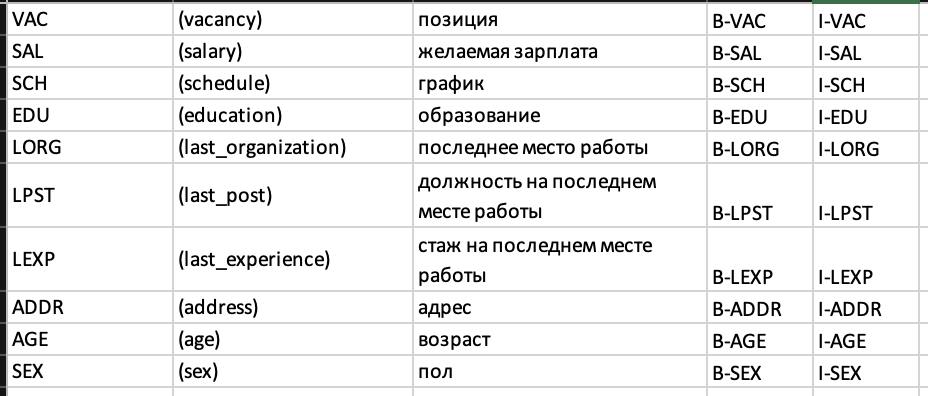

In [7]:
df_resume[df_resume.labels.apply(lambda x: True if 'B-ADDR' in x else False)]

id                                             resume  resume_len  \
1    34957649  id резюме : 34957649 обновлено 24-04-2023 16:1...        1448   
3    32029550  id резюме : 32029550 обновлено 24-04-2023 16:0...         224   
13   35021280  id резюме : 35021280 обновлено 24-04-2023 15:4...          95   
23   22177797  id резюме : 22177797 обновлено 24-04-2023 21:5...          80   
26   33862825  id резюме : 33862825 обновлено 24-04-2023 16:1...         102   
..        ...                                                ...         ...   
536  28096843  id резюме : 28096843 обновлено 24-04-2023 21:5...         405   
551  33899735  id резюме : 33899735 обновлено 24-04-2023 21:5...         186   
552  35160287  id резюме : 35160287 обновлено 24-04-2023 16:0...          90   
565  35061500  id резюме : 35061500 обновлено 24-04-2023 16:2...         137   
587  35161038  id резюме : 35161038 обновлено 24-04-2023 21:5...          37   

                                                labels  labels_len  
1    O O O O O O O B-AGE I-AGE O B-SEX O O O O O O ...      1448.0  
3    O O O O O O O B-AGE I-AGE O B-SEX O O O O O O ...       224.0  
13   O O O O O O O B-AGE I-AGE O B-SEX O O O O O O ...        95.0  
23   O O O O O O O B-AGE I-AGE O B-SEX O O O O O O ...        80.0  
26   O O O O O O O B-AGE I-AGE O B-SEX O O O O O O ...       102.0  
..                                                 ...         ...  
536  O O O O O O O B-AGE I-AGE O B-SEX O O O O O O ...       405.0  
551  O O O O O O O B-AGE I-AGE O B-SEX O O O O O O ...       186.0  
552  O O O O O O O B-AGE I-AGE O B-SEX O O O O O O ...        90.0  
565  O O O O O O O B-AGE I-AGE O B-SEX O O O O O O ...       137.0  
587  O O O O O O O B-AGE I-AGE O B-SEX O O O O O O ...        37.0  

[100 rows x 5 columns]

In [8]:
df_resume.resume[3]

'id резюме : 32029550 обновлено 24-04-2023 16:05:59 44 года , мужчина Санкт-Петербург , Автово Гражданство : Россия Желаемая должность и зарплата Прораб дорожное строительство ( благоустройство ) 100 000 руб . График , место работы Полный рабочий день . Ищу работу в городе : Санкт-Петербург . Командировки возможны . Стаж в желаемой должности 5 лет Специализации Архитектура , проектирование , Сметное дело , Снабжение , закупки , тендеры , Геодезия , землеустройство , Инженерные системы , Автодорожное строительство Профессиональные навыки Ведение переговоров , управление персоналом , чтение чертежей , работа с проектно-сметной документацией , строительно-монтажные работы , руководство бригадой , контроль качества выполненных работ , ведение объекта Основное образование Высшее , Ивановский государственный университет , 2019 ОПЫТ РАБОТЫ 2008 , сентябрь — 2018 , сентябрь , 10 лет директор ооо дорпромстрой административно хозяйственная деятельность . 2001 , июнь — 2008 , сентябрь , 7 лет мас

## Utils

In [9]:
def load_lines(path):
    with open(path) as file:
        for line in file:
            yield line.rstrip('\n')


def show_json(data):
    print(json.dumps(data, indent=2, ensure_ascii=False))


def show_matches(rule, *lines):
    parser = Parser(rule)
    for line in lines:
        matches = parser.findall(line)
        spans = [_.span for _ in matches]
        show_markup(line, spans)

In [10]:
INT = type('INT')
COMMA = eq(',')
COLON = eq(':')

## Rules

### AGE

In [42]:
Age = fact(
    'Age',
    ['age']
)


AGE_INT = and_(
    gte(10),
    lte(80)
).interpretation(
    Age.age.custom(int)
)

AGE = rule(
    AGE_INT,
    normalized('год')
).interpretation(Age)


# parser = Parser(AGE)

show_matches(
    AGE,
    'в 53 году',
    'родился 21 февраля 1990',
    '53 года',
    '20 лет',
    '45 лет'
    
)

в 53 году
  ───────
родился 21 февраля 1990
53 года
───────
20 лет
──────
45 лет
──────


### SEX

In [43]:
Sex = fact(
    'sex',
    ['gender']
)


GENDERS = {
    'Женщина': 'female',
    'женщина': 'female',
    'жен': 'female',

    'Мужчина': 'male',
    'мужчина': 'male',
    'муж': 'male',
}

SEX = rule(in_(GENDERS)).interpretation(
    Sex.gender.custom(GENDERS.get)
)

show_matches(
    SEX,
    'мужчина, Мужчина, мужчину, муж',
    'Женщина',
    'Муж 24 года'
)

мужчина, Мужчина, мужчину, муж
───────  ───────           ───
Женщина
───────
Муж 24 года


### SAL

In [14]:
Money = fact(
    'Money',
    ['amount', 'currency']
)

CURRENCIES = {
    'рублей': 'RUB',
    'руб': 'RUB',
    'грн': 'GRN',
    'бел рублей': 'BEL',
    'бел руб': 'BEL',
    'RUB': 'RUB',
    'EUR': 'EUR',
    'KZT': 'KZT',
    'USD': 'USD',
    'KGS': 'KGS'
}

CURRENCY = pipeline(CURRENCIES).interpretation(
    Money.currency.normalized().custom(CURRENCIES.get)
)


def normalize_amount(value):
    return int(value.replace(' ', ''))


AMOUNT = or_(
    rule(INT),
    rule(INT, INT),
    rule(INT, "-", INT),
)

MONEY = rule(
    AMOUNT,
    CURRENCY
)


show_matches(
    MONEY,
    '120000 рублей, 10000-20000 бел рублей',
    '1 500 руб.',
    '1 000 000 грн.',
    '5000 бел.руб.',
    '20 000 KGS',
)

120000 рублей, 10000-20000 бел рублей
─────────────  ──────────────────────
1 500 руб.
───────── 
1 000 000 грн.
  ─────────── 
5000 бел.руб.
20 000 KGS
──────────


### ADDR

In [15]:
AREAS = set(load_lines('areas.txt'))
METRO_STATIONS = set(load_lines('metro.txt'))


Address = fact(
    'Location',
    ['area', 'metro']
)


METRO = rule(
    eq('м').optional(), eq('.').optional(),
    morph_pipeline(METRO_STATIONS).interpretation(
        Address.metro
    )
)

AREA = morph_pipeline(AREAS).interpretation(
    Address.area
)

ADDR = or_(
    rule(
      AREA,
      rule(
          COMMA.optional(),
          METRO.repeatable()
      ).optional()
    ),
    rule(
      AREA.optional(),
      rule(
          COMMA.optional(),
          METRO.repeatable()
      )
    ),
).interpretation(
    Address
)


show_matches(
    ADDR,
    'место проживания: Москва, м. Парк Победы',
    'Киев, м.Киевская',
    'Россия',
    'в Москве',
    'м. парк победы',
    'на м. Кропоткинской',
    'Санкт-Петербург , Обухово Гражданство',
    'Санкт-Петербург , Автово Гражданство'
)

место проживания: Москва, м. Парк Победы
                  ──────────────────────
Киев, м.Киевская
────────────────
Россия
──────
в Москве
  ──────
м. парк победы
──────────────
на м. Кропоткинской
   ────────────────
Санкт-Петербург , Обухово Гражданство
─────────────────────────            
Санкт-Петербург , Автово Гражданство
────────────────────────            


In [21]:
rule

<function yargy.api.rule(*items)>

### VAC

In [16]:
SPECIALIZATIONS = set(load_lines('specialization.txt'))
SUBSPECIALIZATIONS = set(load_lines('subspecialization.txt'))


SPECIALIZATION = pipeline(SPECIALIZATIONS)
SUBSPECIALIZATION = pipeline(SUBSPECIALIZATIONS)

POSITION = rule(
    or_(
        SPECIALIZATION,
        SUBSPECIALIZATION
    )
)
TOKENIZER = MorphTokenizer().remove_types(EOL)
parser = Parser(POSITION, tokenizer=TOKENIZER)

seed(10)
for text in sample(df_resume.resume.tolist(), 10):
    for match in parser.findall(text):
        start, stop = match.span
        print(text[start:stop])
        print('---')
    if list(parser.findall(text)) == []:
        print(text)
        print('---')

Слесарь
---
Слесарь
---
Разнорабочий
---
id резюме : 35041614 обновлено 24-04-2023 16:03:20 56 лет , мужчина Санкт-Петербург Гражданство : Россия Желаемая должность и зарплата Руководитель отдела продаж 200 000 руб . График , место работы Полный рабочий день . Ищу работу в городе : Санкт-Петербург . Командировки невозможны . Стаж в желаемой должности 5 лет Специализации Продукты Профессиональные навыки Мотивация персонала , техника продаж , ценообразование , анализ рынка , анализ продаж , активные продажи , выполнение плана продаж , увеличение объемов продаж , планирование продаж , управление продажами Основное образование Высшее , « Санкт-Петнрбургский университет управления и экономики » , 2012 ОПЫТ РАБОТЫ 1992 , август — 2023 , февраль , 30 лет Директор отдела продаж ОАО `` ВЕЛИКОЛУКСКИЙ МЯСОКОМБИНАТ '' Санкт-Петербург Основное образование 2012 г.в . Высшее образование ( специалист ) « Санкт-Петнрбургский университет управления и экономики » Менеджер Подробнее о себе Водительские пр

# Pipeline

In [75]:
import yargy
from yargy.interpretation import custom
from yargy.predicates import gram


entities_parsers = {
    "SEX": Parser(SEX),
    "AGE": Parser(AGE),
    "ADDR": Parser(ADDR),
    "SAL": Parser(MONEY),
    "POSITION": Parser(POSITION),
}

In [76]:
def parse_all_entities(text, entities_parsers: dict):
    entities = []
    for entity_name, entity_parser in entities_parsers.items():
        entity = [
            (entity_name, list(match_entity.span)[0], list(match_entity.span)[1])
            for match_entity in entity_parser.findall(text)
        ]
        entities.extend(entity)
    entities = sorted(entities, key=lambda x: x[1])
    return entities

In [77]:
parse_all_entities(text, entities_parsers)

[('AGE', 51, 58),
 ('SEX', 61, 68),
 ('ADDR', 69, 99),
 ('ADDR', 114, 120),
 ('SAL', 184, 195),
 ('ADDR', 264, 279),
 ('ADDR', 951, 957),
 ('ADDR', 1432, 1447),
 ('ADDR', 1484, 1499),
 ('POSITION', 2326, 2338),
 ('POSITION', 2388, 2398),
 ('POSITION', 2438, 2446),
 ('POSITION', 3936, 3939),
 ('POSITION', 4039, 4042),
 ('ADDR', 5395, 5401),
 ('ADDR', 5436, 5442),
 ('ADDR', 5515, 5521),
 ('ADDR', 6088, 6094),
 ('ADDR', 6109, 6115)]

In [85]:
text[69:99]

'Санкт-Петербург , Чернышевская'

In [88]:
df_resume['pred_labels'] = df_resume.resume.apply(lambda x: parse_all_entities(x, entities_parsers))

In [101]:
df_resume.pred_labels = df_resume.pred_labels.astype(str)

1      [('AGE', 51, 57), ('SEX', 60, 67), ('ADDR', 68...
3      [('AGE', 51, 58), ('SEX', 61, 68), ('ADDR', 69...
13     [('AGE', 51, 57), ('SEX', 60, 67), ('ADDR', 68...
23     [('AGE', 51, 57), ('SEX', 60, 67), ('ADDR', 68...
26     [('AGE', 51, 57), ('SEX', 60, 67), ('ADDR', 68...
                             ...                        
536    [('AGE', 51, 57), ('SEX', 60, 67), ('ADDR', 68...
551    [('AGE', 51, 57), ('SEX', 60, 67), ('ADDR', 68...
552    [('AGE', 51, 58), ('SEX', 61, 68), ('ADDR', 69...
565    [('AGE', 51, 58), ('SEX', 61, 68), ('ADDR', 69...
587    [('AGE', 51, 57), ('SEX', 60, 67), ('ADDR', 68...
Name: pred_labels, Length: 100, dtype: object

In [103]:
df_resume.to_csv('NER_resume_first_version_preds.csv', index=False)

In [105]:
test = pd.read_csv('NER_resume_first_version_preds.csv')

In [109]:
import ast
ast.literal_eval(test.pred_labels[0])

[('AGE', 51, 57),
 ('SEX', 60, 67),
 ('ADDR', 68, 93),
 ('ADDR', 108, 114),
 ('SAL', 179, 190),
 ('ADDR', 259, 274),
 ('POSITION', 395, 407),
 ('ADDR', 573, 579),
 ('ADDR', 596, 611),
 ('ADDR', 693, 708),
 ('ADDR', 884, 886),
 ('POSITION', 890, 893),
 ('ADDR', 910, 925),
 ('ADDR', 1234, 1249),
 ('POSITION', 1629, 1641),
 ('POSITION', 1918, 1930),
 ('POSITION', 2038, 2063),
 ('ADDR', 2067, 2075),
 ('POSITION', 2407, 2415),
 ('ADDR', 2438, 2446),
 ('ADDR', 2841, 2856),
 ('ADDR', 3223, 3238),
 ('POSITION', 3812, 3823),
 ('ADDR', 3870, 3885),
 ('POSITION', 4689, 4697),
 ('ADDR', 4776, 4783),
 ('ADDR', 4797, 4812),
 ('POSITION', 4815, 4822),
 ('ADDR', 5898, 5910),
 ('POSITION', 6216, 6228),
 ('POSITION', 6660, 6672),
 ('POSITION', 6779, 6791),
 ('ADDR', 7170, 7175),
 ('POSITION', 7399, 7411),
 ('POSITION', 7518, 7530),
 ('POSITION', 7984, 7996),
 ('POSITION', 8103, 8115),
 ('POSITION', 8358, 8365),
 ('ADDR', 8795, 8810),
 ('ADDR', 8867, 8882),
 ('ADDR', 9063, 9070),
 ('ADDR', 9181, 9187),
 

In [22]:
get_entities(df_resume.labels.tolist()[0].split(' '))

[('AGE', 7, 9),
 ('SEX', 10, 11),
 ('VAC', 21, 23),
 ('SAL', 23, 27),
 ('SCH', 31, 34),
 ('ADDR', 40, 41),
 ('EDU', 79, 86),
 ('LEXP', 96, 98),
 ('LPST', 98, 101),
 ('EDU', 1298, 1306),
 ('EDU', 1307, 1315),
 ('EDU', 1316, 1325),
 ('EDU', 1326, 1331),
 ('EDU', 1332, 1348),
 ('EDU', 1349, 1360),
 ('EDU', 1361, 1380),
 ('EDU', 1382, 1393)]

In [1]:
df_resume

NameError: ignored

In [45]:
df_resume.labels.tolist()[0]

'O O O O O O O B-AGE I-AGE O B-SEX O O O O O O O O O O B-VAC I-VAC B-SAL I-SAL I-SAL I-SAL O O O O B-SCH I-SCH I-SCH O O O O O O B-ADDR O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O B-EDU I-EDU I-EDU I-EDU I-EDU I-EDU I-EDU O O O O O O O O O O B-LEXP I-LEXP B-LPST I-LPST I-LPST O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O

In [21]:
from typing import List, Tuple

def get_entities(labels: List[str]) -> List[Tuple[str, int, int]]:
    """
    Convert a list of labels into a list of entities with their corresponding start and end positions.
    """
    entities = []
    start = None
    for i in range(len(labels)):
        label = labels[i]
        if label.startswith("B-"):
            if start is not None:
                entities.append((entity_type, start, i))
            entity_type = label[2:]
            start = i
        elif label.startswith("I-"):
            if entity_type != label[2:] or start is None:
                start = i
                entity_type = label[2:]
        else:
            if start is not None:
                entities.append((entity_type, start, i))
            start = None
    if start is not None:
        entities.append((entity_type, start, len(labels)))
    return entities

def compute_f1(true_labels: List[str], pred_labels: List[str]) -> float:
    """
    Compute the F1 score for a named entity recognition task.
    """
    true_entities = get_entities(true_labels)
    pred_entities = get_entities(pred_labels)

    # Compute precision, recall, and F1 score for each entity type
    types = set(e[0] for e in true_entities + pred_entities)
    precisions = []
    recalls = []
    f1_scores = []
    for t in types:
        true_entities_t = [e for e in true_entities if e[0] == t]
        pred_entities_t = [e for e in pred_entities if e[0] == t]
        true_positives = len(set(true_entities_t) & set(pred_entities_t))
        false_positives = len(pred_entities_t) - true_positives
        false_negatives = len(true_entities_t) - true_positives
        precision = true_positives / (true_positives + false_positives + 1e-10)
        recall = true_positives / (true_positives + false_negatives + 1e-10)
        f1 = 2 * precision * recall / (precision + recall + 1e-10)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    # Compute micro-averaged F1 score
    micro_precision = sum(precisions) / len(precisions)
    micro_recall = sum(recalls) / len(recalls)
    micro_f1 = 2 * micro_precision * micro_recall / (micro_precision + micro_recall + 1e-10)
    return micro_f1
